In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from collections import namedtuple
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
df = pd.read_csv("C:/Users/Sys/Desktop/CodeSoft/MovieRatingPredicton/IMDb Movies India.csv", encoding='latin1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [8]:
print('INFO:',"\n")
print(df.info(),"\n\n\n\n\n")

INFO: 

<class 'pandas.core.frame.DataFrame'>
Index: 11086 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11086 non-null  object 
 1   Year      11086 non-null  object 
 2   Duration  11086 non-null  float64
 3   Genre     11086 non-null  object 
 4   Rating    11086 non-null  float64
 5   Votes     11086 non-null  float64
 6   Director  11086 non-null  object 
 7   Actor 1   11086 non-null  object 
 8   Actor 2   11086 non-null  object 
 9   Actor 3   11086 non-null  object 
dtypes: float64(3), object(7)
memory usage: 952.7+ KB
None 







In [9]:
print('summary of the dataframe:',"\n",df.describe,"\n\n\n\n\n")
print('nunique:',"\n",df['Genre'].nunique(),"\n\n\n\n\n")

summary of the dataframe: 
 <bound method NDFrame.describe of                                      Name    Year    Duration  \
1      #Gadhvi (He thought he was Gandhi)  (2019)  109.000000   
2                             #Homecoming  (2021)   90.000000   
3                                 #Yaaram  (2019)  110.000000   
4                       ...And Once Again  (2010)  105.000000   
5                    ...Aur Pyaar Ho Gaya  (1997)  147.000000   
...                                   ...     ...         ...   
15502                       Zulm Ki Pukar  (1979)  128.193162   
15503                     Zulm Ki Zanjeer  (1989)  125.000000   
15504                 Zulm Ko Jala Doonga  (1988)  128.193162   
15505                               Zulmi  (1999)  129.000000   
15508                        Zulm-O-Sitam  (1998)  130.000000   

                        Genre  Rating        Votes            Director  \
1                       Drama     7.0     8.000000       Gaurav Bakshi   
2        

In [10]:
print('unique:',"\n",df['Year'].unique(),"\n\n\n\n\n")
print('Rating.unique:',"\n",df.Rating.unique(),"\n\n\n\n\n")

unique: 
 ['(2019)' '(2021)' '(2010)' '(1997)' '(2005)' '(2012)' '(2014)' '(2004)'
 '(2016)' '(1991)' '(2018)' '(1987)' '(1958)' '(2017)' '(2020)' '(2009)'
 '(1993)' '(2002)' '(1946)' '(2008)' '(1994)' '(2007)' '(2013)' '(2003)'
 '(1998)' '(1979)' '(1956)' '(1974)' '(2015)' '(2006)' '(1981)' '(1985)'
 '(2011)' '(2001)' '(1988)' '(1995)' '(1970)' '(2000)' '(1999)' '(1973)'
 '(1968)' '(1953)' '(1986)' '(1982)' '(1977)' '(1996)' '(1950)' '(1957)'
 '(1969)' '(1948)' '(1967)' '(1990)' '(1975)' '(1989)' '(1947)' '(1972)'
 '(1971)' '(1978)' '(1944)' '(1963)' '(1992)' '(1976)' '(1984)' '(1940)'
 '(1980)' '(1966)' '(1962)' '(1960)' '(1964)' '(1952)' '(1959)' '(1983)'
 '(1951)' '(1954)' '(1961)' '(1965)' '(1933)' '(1955)' '(1936)' '(1939)'
 '(2022)' '(1949)' '(1937)' '(1941)' '(1945)' '(1938)' '(1935)' '(1942)'
 '(1943)' '(1932)' '(1931)' '(1934)' '(1928)' '(1917)'] 





Rating.unique: 
 [ 7.   6.2  4.4  4.7  7.4  5.6  4.   5.9  6.5  5.7  6.3  7.2  6.6  7.3
  7.1  6.9  3.5  5.   4.5  6.4  4.1  

In [13]:
print('unique:',"\n",df['Duration'].unique(),"\n\n\n\n\n")
print("groupby(['Genre']':","\n",df.groupby(['Genre']).count(),"\n\n\n\n\n")

unique: 
 [109.          90.         110.         105.         147.
 142.          82.         116.          96.         120.
 161.         166.         102.         128.19316215  87.
 132.          66.         146.         168.         158.
 126.          94.         138.         124.         144.
 157.         136.         107.         113.          80.
 122.         149.         148.         130.         121.
 188.         115.         103.         114.         170.
 100.          99.         140.         128.          93.
 125.         145.          75.         111.         134.
 104.          92.         137.         127.         150.
 119.         135.          76.         151.          95.
 112.         143.         177.         117.         123.
  72.         154.         175.         153.          78.
 139.         133.         180.          60.          46.
 164.         162.         171.         160.         152.
  62.         163.         165.         141.         129.
 156

In [14]:
print("value_counts:","\n",df["Director"].value_counts().head(6),"\n\n\n\n\n")
print('isnull().any():',"\n",df.isnull().any(),"\n\n\n\n\n")

value_counts: 
 Director
Kanti Shah              50
Mahesh Bhatt            46
David Dhawan            43
Hrishikesh Mukherjee    42
B.R. Ishara             40
Babubhai Mistry         38
Name: count, dtype: int64 





isnull().any(): 
 Name        False
Year        False
Duration    False
Genre       False
Rating      False
Votes       False
Director    False
Actor 1     False
Actor 2     False
Actor 3     False
dtype: bool 







In [17]:
# Dropping null values
df.dropna(subset=['Year'], inplace=True)
df.dropna(subset=['Genre'], inplace=True)

In [18]:
# Replacing Null Values ....
df['Rating'].fillna(df['Rating'].mode().max(), inplace=True)
df['Duration'].fillna(df['Duration'].mean(), inplace=True)
df['Votes'].fillna(df['Votes'].mean(), inplace=True)
df.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)

In [19]:
print('Null Values in Year Column',df['Year'].isnull().sum())
print('Null Values in Genre Column',df['Genre'].isnull().sum())

Null Values in Year Column 0
Null Values in Genre Column 0


In [20]:
def Talents(column):
    global df
    df[column].value_counts().sort_values(ascending=False)[:10].plot(kind="bar", figsize=(20,6), edgecolor="k")
    plt.xticks(rotation=0)
    plt.title("Top Ten {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

In [21]:
def Histo(column):
    global df
    plt.figure(figsize=(20,6))
    plt.hist(df[column], edgecolor="k")
    plt.xticks(rotation=0)
    plt.title("Histogram of {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

In [22]:
def Scatter(x, y, c=None):
    global df
    plt.figure(figsize=(20,6))
    plt.scatter(df[x], df[y], edgecolor="k", c=c)
    plt.xticks(rotation=0)
    plt.title("Scatter plot X:{} / Y:{}".format(x, y))
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show() 

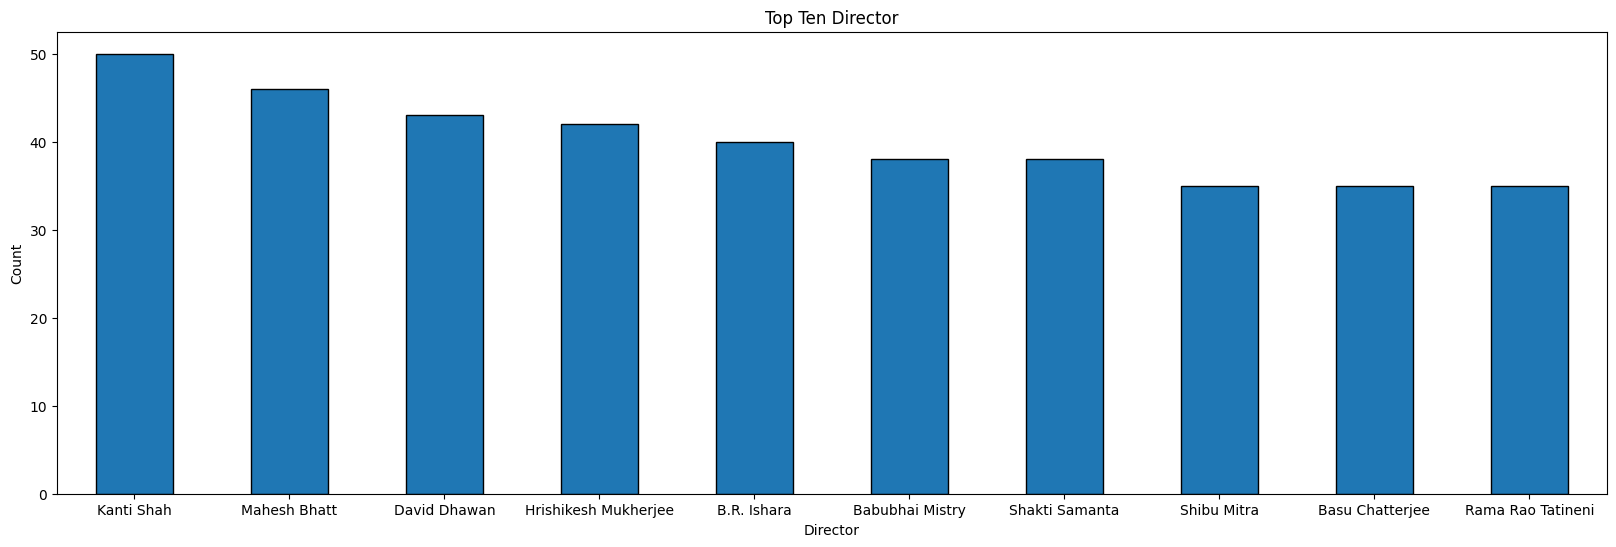

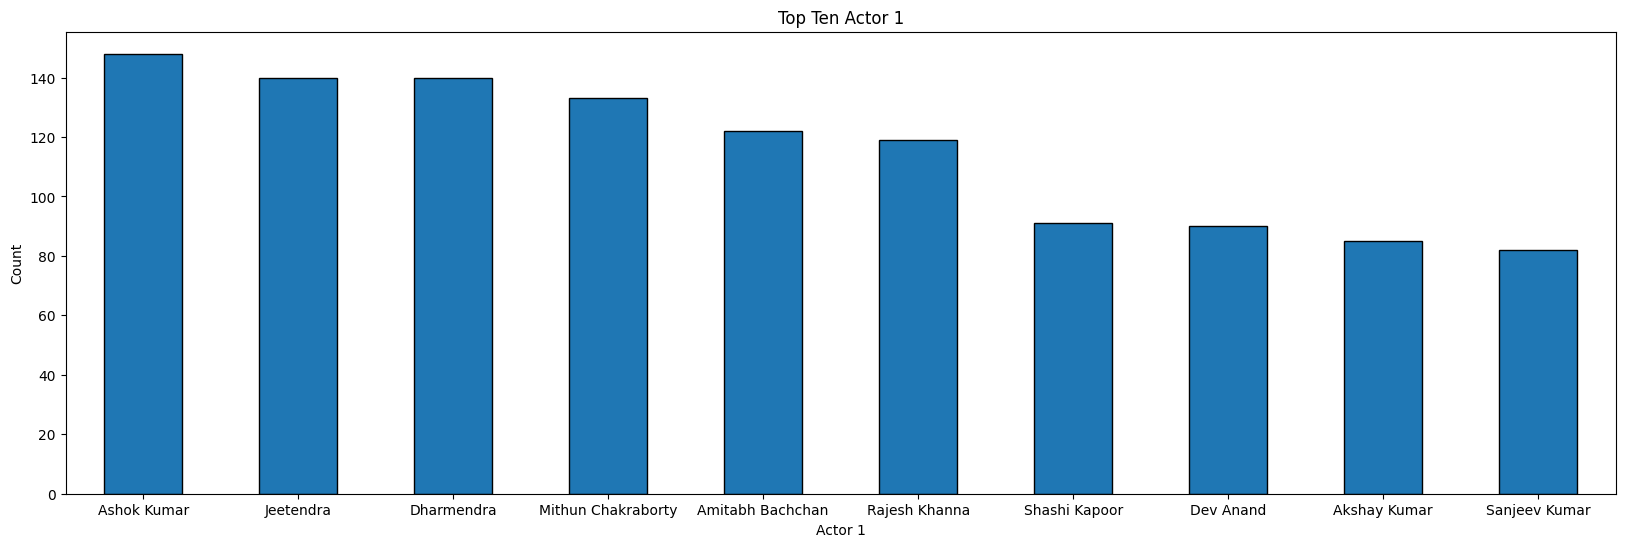

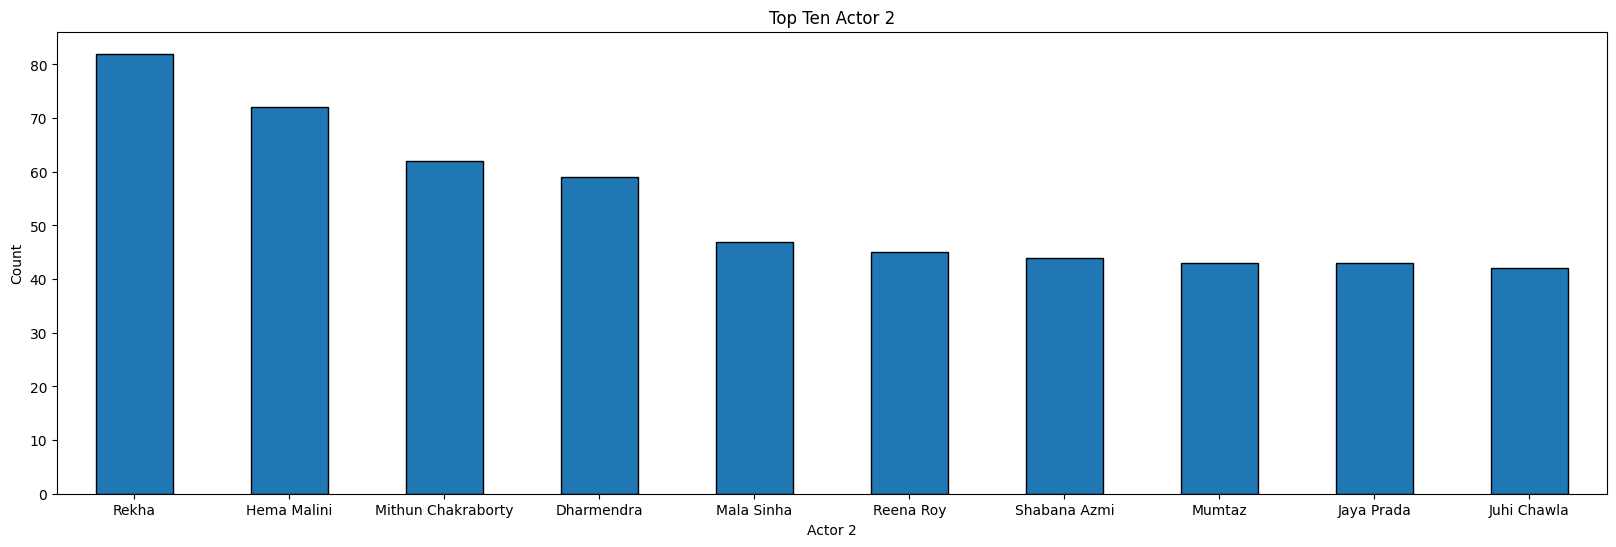

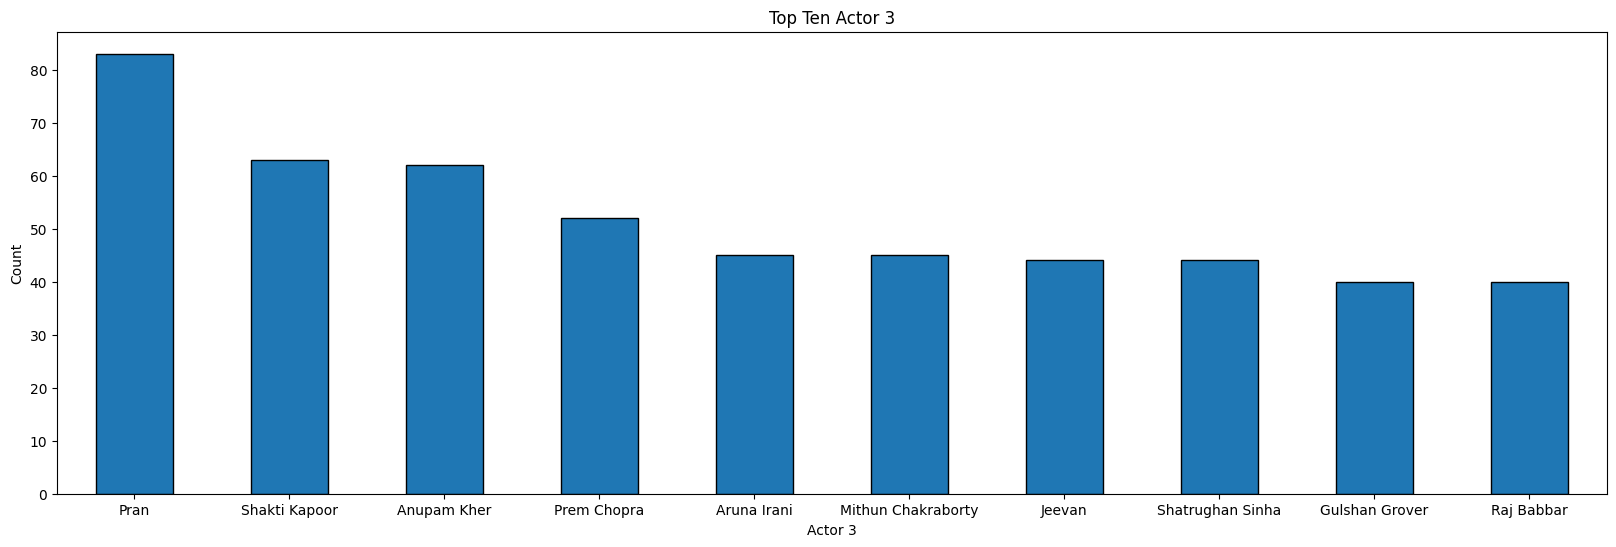

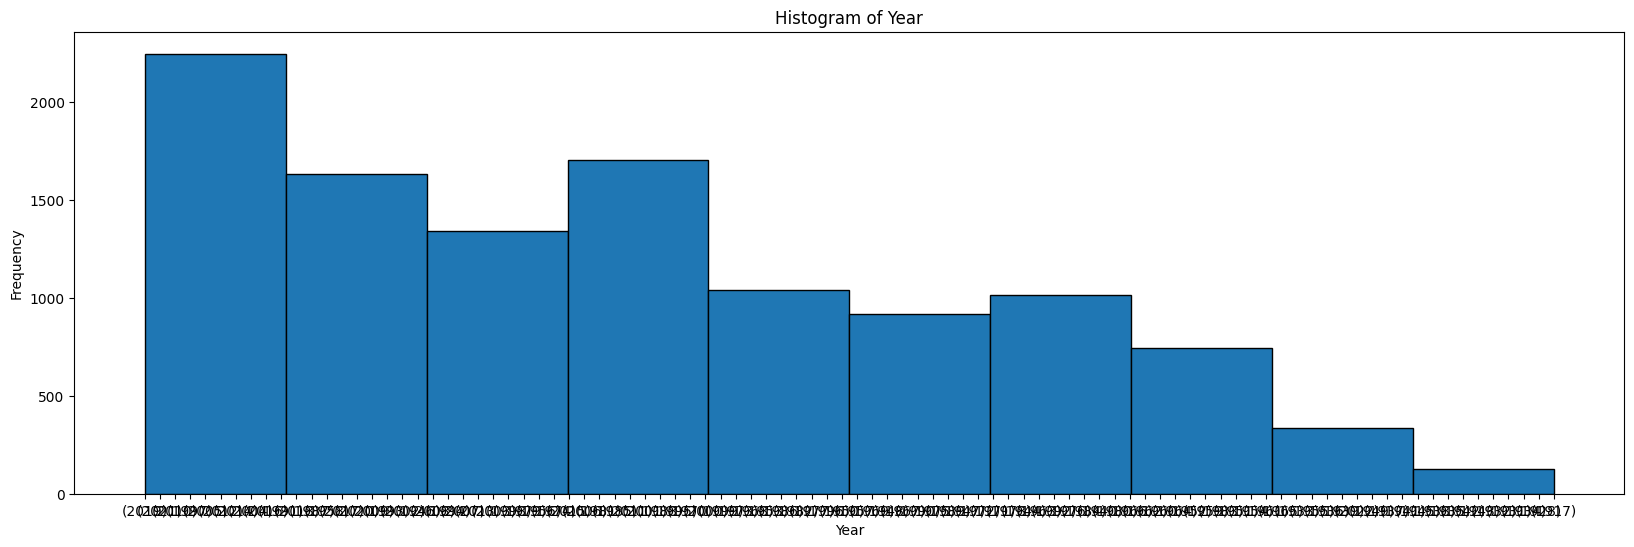

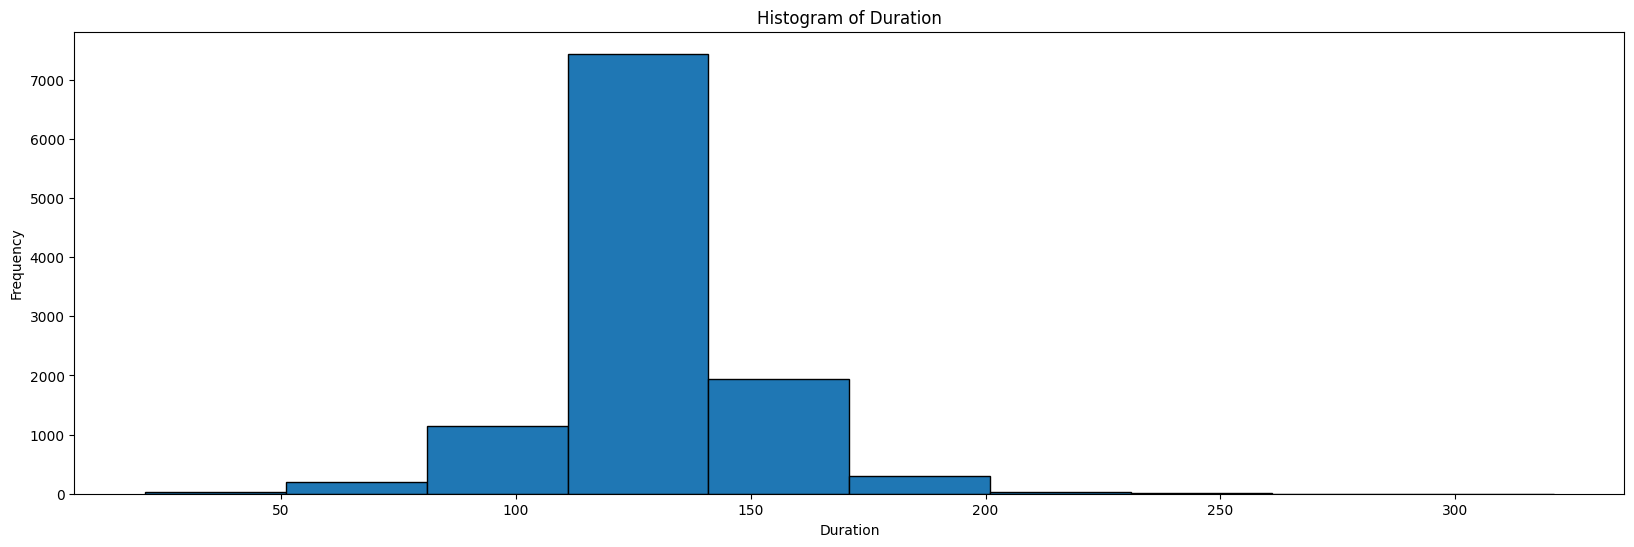

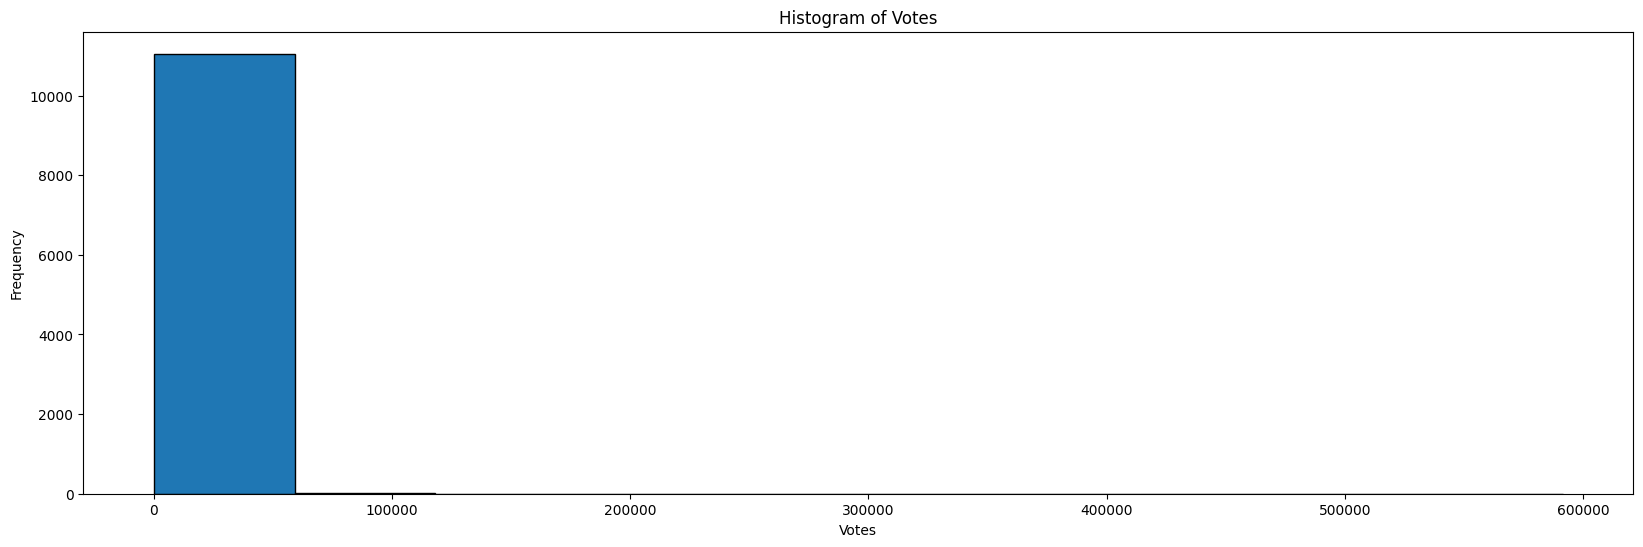

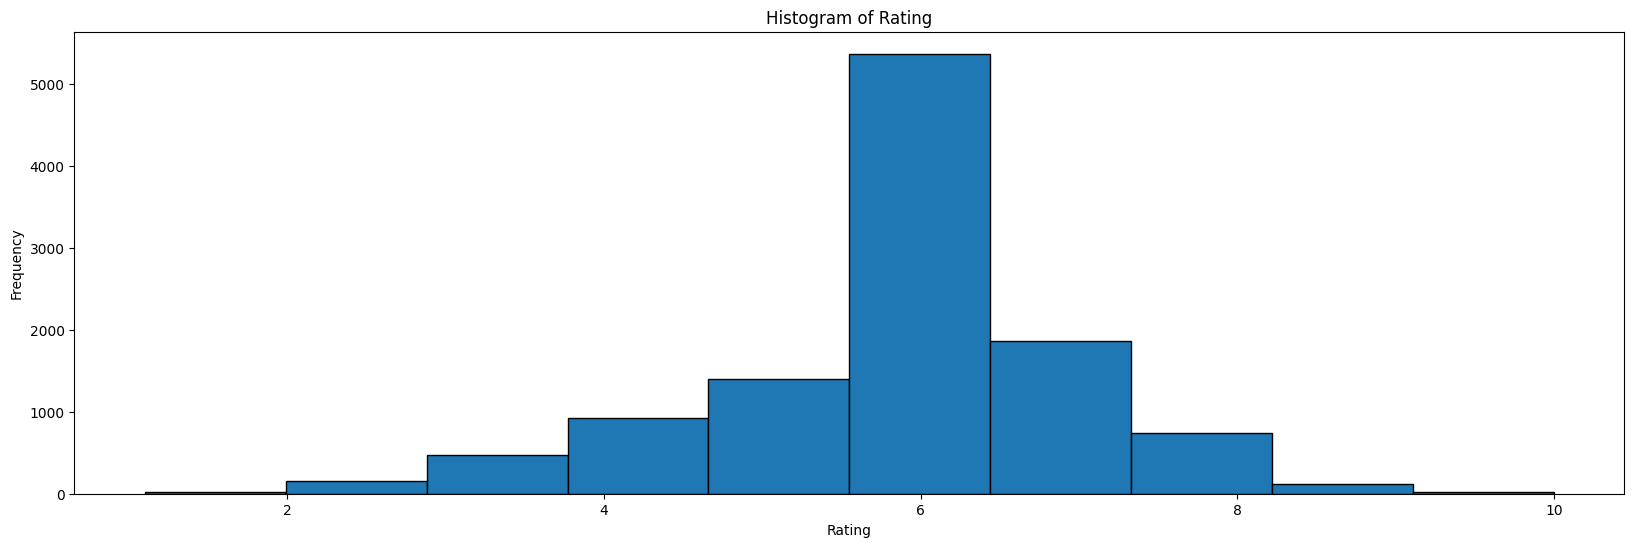

In [23]:
Talents("Director")
Talents("Actor 1")
Talents("Actor 2")
Talents("Actor 3")
Histo("Year")
Histo("Duration")
Histo("Votes")
Histo("Rating")

In [25]:
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
print(non_numeric_columns)

Index(['Name', 'Year', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], dtype='object')


In [26]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr(method='spearman')
print(df.columns)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [27]:
df.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)
(round(df.isnull().sum()/df.isnull().count(), 4)*100).sort_values(ascending=False)

Name        0.0
Year        0.0
Duration    0.0
Genre       0.0
Rating      0.0
Votes       0.0
Director    0.0
Actor 1     0.0
Actor 2     0.0
Actor 3     0.0
dtype: float64

In [28]:
print(df.columns)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [29]:
df['Year'] = df['Year'].str.extract('(\d+)').astype(float)

# Encoding categorical variables based on mean ratings
actor1_encoding_map = df.groupby('Actor 1').agg({'Rating': 'mean'}).to_dict()['Rating']
actor2_encoding_map = df.groupby('Actor 2').agg({'Rating': 'mean'}).to_dict()['Rating']
actor3_encoding_map = df.groupby('Actor 3').agg({'Rating': 'mean'}).to_dict()['Rating']
director_encoding_map = df.groupby('Director').agg({'Rating': 'mean'}).to_dict()['Rating']
genre_encoding_map = df.groupby('Genre').agg({'Rating': 'mean'}).to_dict()['Rating']
df['actor1_encoded'] = round(df['Actor 1'].map(actor1_encoding_map), 1)
df['actor2_encoded'] = round(df['Actor 2'].map(actor2_encoding_map), 1)
df['actor3_encoded'] = round(df['Actor 3'].map(actor3_encoding_map), 1)
df['director_encoded'] = round(df['Director'].map(director_encoding_map), 1)
df['genre_encoded'] = round(df['Genre'].map(genre_encoding_map), 1)

# Drop original categorical columns
df.drop(['Actor 1', 'Actor 2', 'Actor 3', 'Director', 'Genre'], axis=1, inplace=True)

In [30]:
# Define features and target variable
X = df[['Year', 'Duration', 'Votes', 'actor1_encoded', 'actor2_encoded', 'actor3_encoded', 'director_encoded', 'genre_encoded']]
y = df['Rating']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [37]:
# Evaluate Random Forest Regressor
print('\nRandom Forest Regressor Metrics:')
print('Mean Squared Error:', mean_squared_error(y_test, rf_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, rf_pred))
print('R2 Score:', r2_score(y_test, rf_pred))


Random Forest Regressor Metrics:
Mean Squared Error: 0.26528620108205586
Mean Absolute Error: 0.3030360685302131
R2 Score: 0.7992105977164775


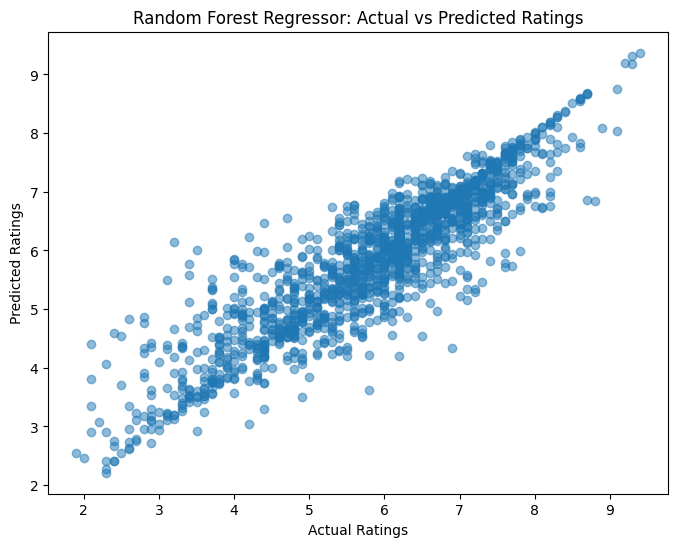

In [38]:
import matplotlib.pyplot as plt
# Scatter plot for Random Forest Regressor predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.title('Random Forest Regressor: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()